In [1]:
from tsp_annealing import *
import matplotlib.pyplot as plt

Best tour: [ 4 37 10 31 26 50 45 11 46 17  3 16 36 14 43 41 18 39 40 12 24 13  0  1
 15 20 28 21  7 47  5 23 42 22  6 25 30 27  2 35 34 19 49  8 33 29  9 38
 32 44 48]
Best distance: 496.2748166055886


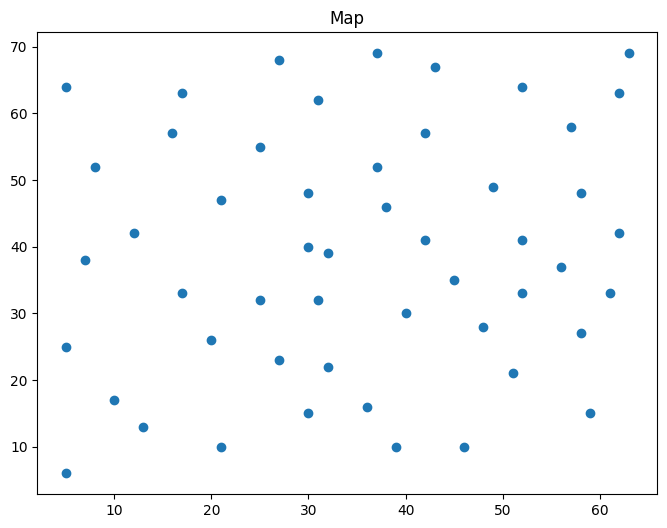

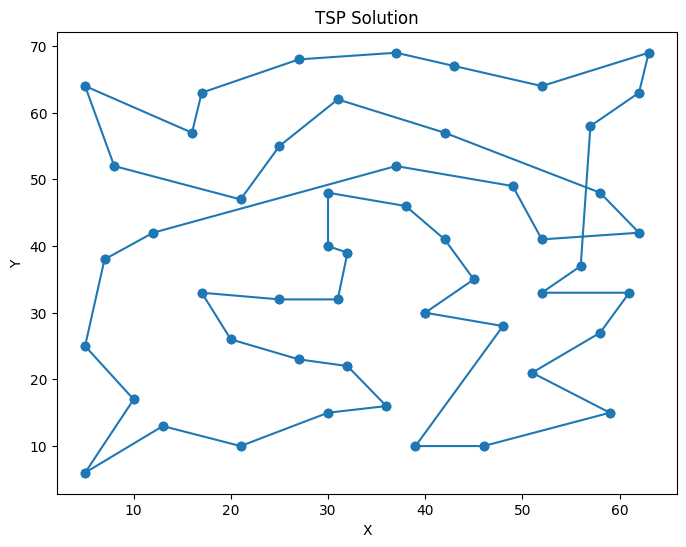

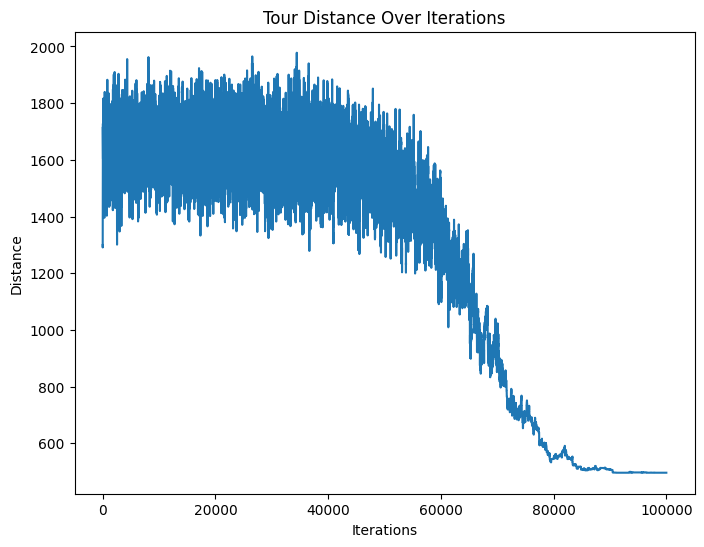

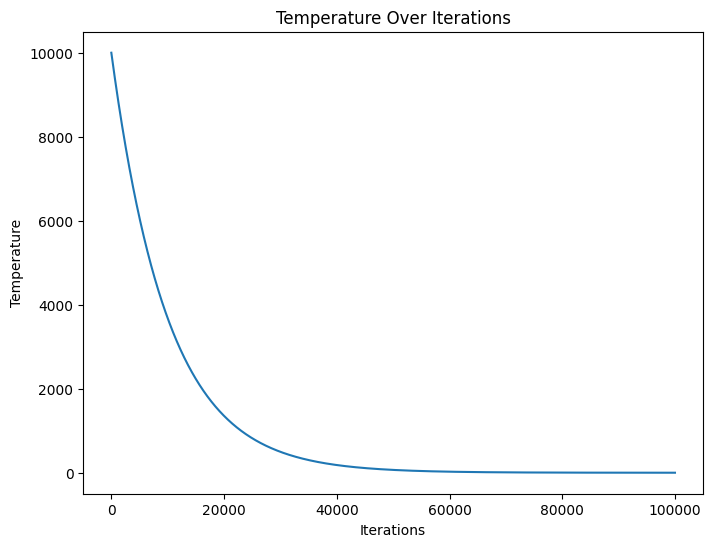

In [9]:
cities = load_graph('TSP-Configurations/eil51.tsp.txt')

plt.figure(figsize=(8, 6))
plt.scatter([elem[0] for elem in cities], [elem[1] for elem in cities])
plt.title('Map')

distances = calculate_distances(cities)

best_tour, best_distance, cost_over_iterations, temperature_over_interations = perform_annealing(distances, max_iterations=int(1E5), alpha=0.9999)

print("Best tour:", best_tour)
print("Best distance:", best_distance)

plot_tour(best_tour, cities)

plt.figure(figsize=(8, 6))
plt.plot(cost_over_iterations)
plt.title('Tour Distance Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Distance')

plt.plot(temperature_over_interations)
plt.title('Temperature Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Temperature')

plt.show()

Best tour: [131 150 180 173 107 109 117  59  43  57  67  66  71  77  74  92  97  91
 102 104 108 103  86  85 115 112  87 111  42  41  37  36  49  50  51  68
  69  56  54  52  53  48  35 127 130 133 135 147 146 144 198 200 122 124
 153 154 149 205 208 204 202 201 142 206 247   2 279   0   4   7   6  10
 262 141 145 143 199 190 189 165 166 169 168 167 164 187 184 183 161 162
 163 188 191 203 212 211 224 223 210 140 138 136 267  15  12  14  11 274
 275 278 242 243 248 261 128 125  29  44  58  63  64  70  72  76  73  75
  81 114 119 118 156 158 175 179 178 177 157  60  61  62  83  82  88  89
 100  99 101 172 176 152 129  18  19  16  13  23  22  25  30  40  45  46
  38  39  33 121 155 151 139 253 252 209 228 227 226 225 251 207 186 182
 181 192 193 215 216 217 218 239 244   3 276 277 246 245 232 231 240 241
   1   5   8 259 260 197 195 194 196 185 170  90  78  93  80  79  94  95
  96  98 219 220 221 222 214 213 229 249 254 258 266 265 264 271 273 272
   9 270 269  20  28 123 116 106 105 171

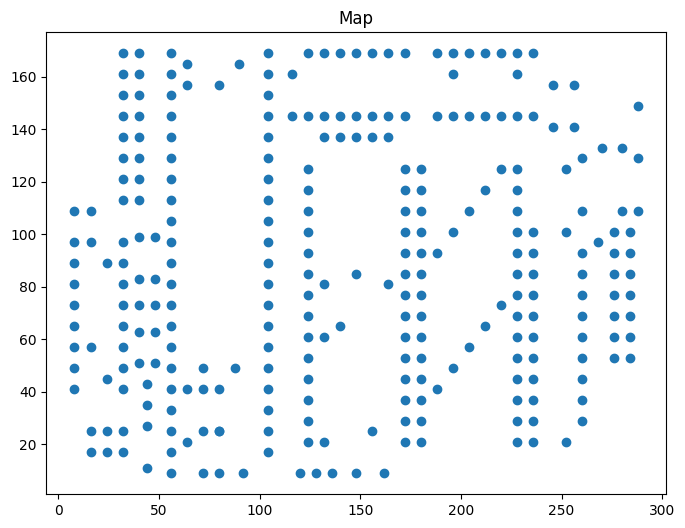

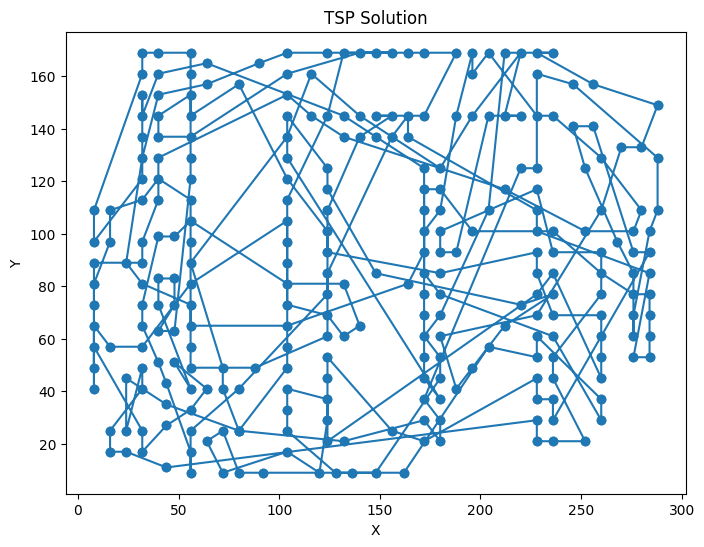

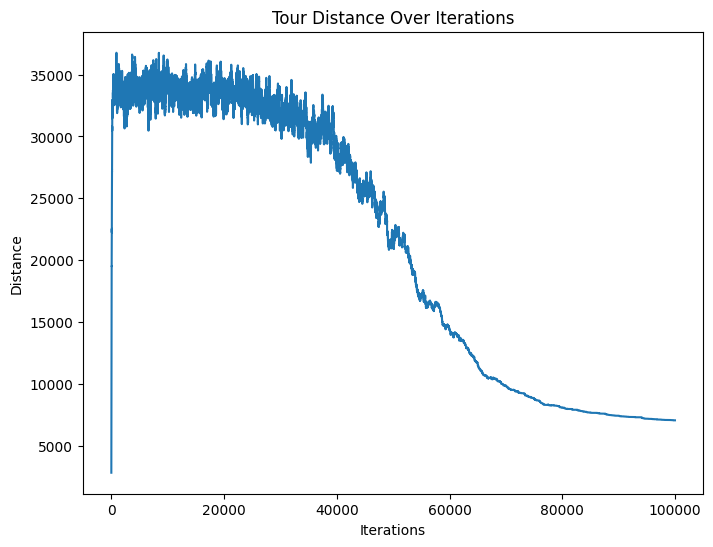

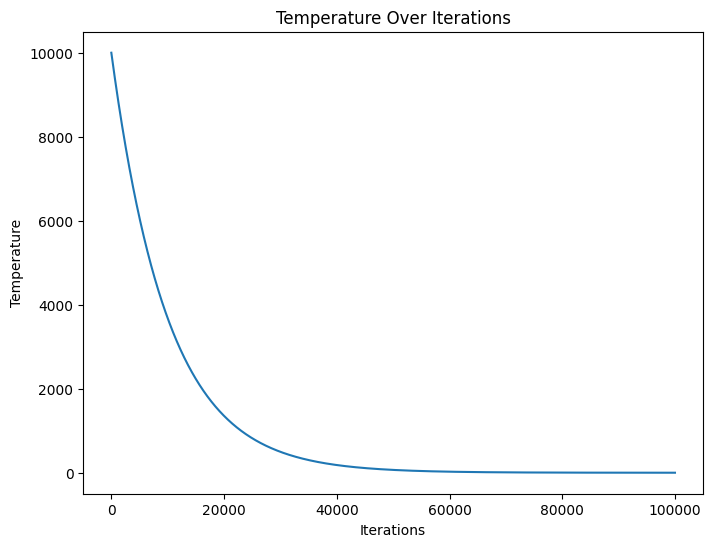

In [10]:
cities = load_graph('TSP-Configurations/a280.tsp.txt')

plt.figure(figsize=(8, 6))
plt.scatter([elem[0] for elem in cities], [elem[1] for elem in cities])
plt.title('Map')

distances = calculate_distances(cities)

best_tour, best_distance, cost_over_iterations, temperature_over_interations = perform_annealing(distances, max_iterations=int(1E5), alpha=0.9999)

print("Best tour:", best_tour)
print("Best distance:", best_distance)

plot_tour(best_tour, cities)

plt.figure(figsize=(8, 6))
plt.plot(cost_over_iterations)
plt.title('Tour Distance Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Distance')


plt.plot(temperature_over_interations)
plt.title('Temperature Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Temperature')

plt.show()

Best tour: [437 274 264 158  85  84  52  51  18  17  48  15  14  43 151 186 210 242
 243 244 414 298 300 299 202 177 190 164 396 200 213 174 227 266 273 307
 281 308 282 251 254 407 408 216 205 206 217 218 413 436 337 374 373 372
 327 301 277 416 253 252 302 333 367 364 319 318 314 406 161 149 125 113
 102  82 381  90 378  63  62 384 184 171 400 405 402 220 368 369 371 331
 419 225 182 144 120  89  57  88 169 196 403 235 219 209 134 124  60  54
  50 105 137 388 126 148 135 440 103  72  73  74  76  46  78 117 392 270
 310 348 432 309 395 136 385 101  66  34  70 162 224 263 410 198 197 179
  38   4  35  69  71  39   9  10  77  13  45  42  41   6   7   8 140 153
 195 181 145 132  58  94 379 123 236 335 334 370 431 336 426 306 409 208
  21  53 438 129 389 130 119 121 109  59  26  91 100 435  93  61  27  28
  32  96  97  64  31 375 376  30  29  92 142 155 394 176 188 411 261 262
 415 271 326 363 365 366 430 288 289 292 294 320 321 323 295 257 232 128
  98  75  40   3   1   2  33  65  67 163

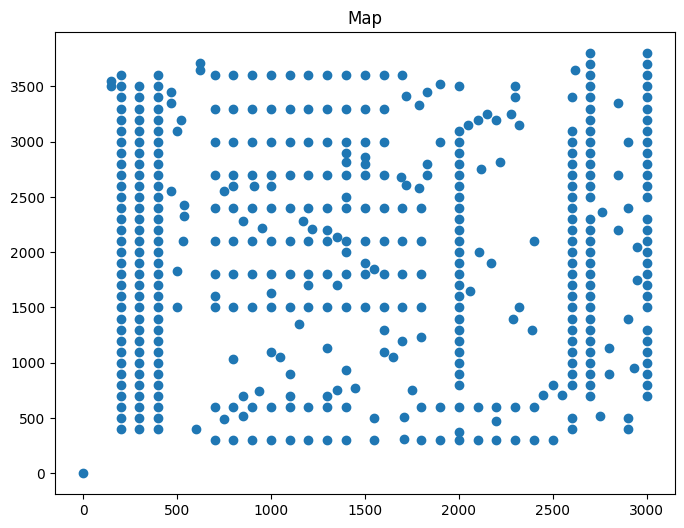

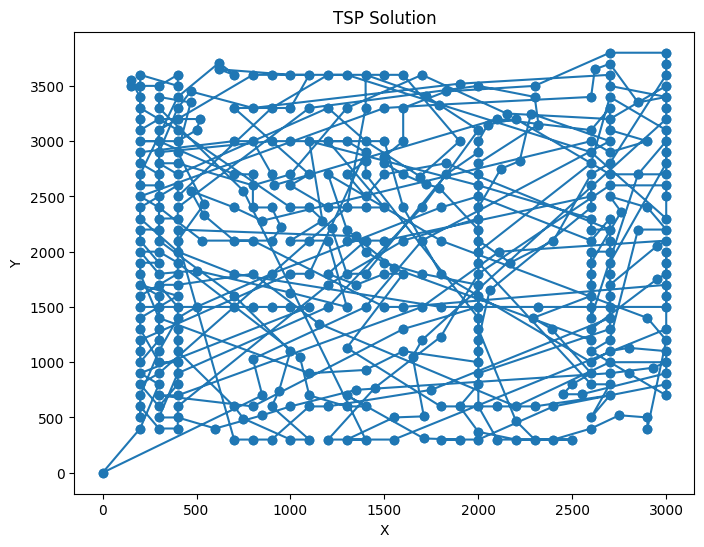

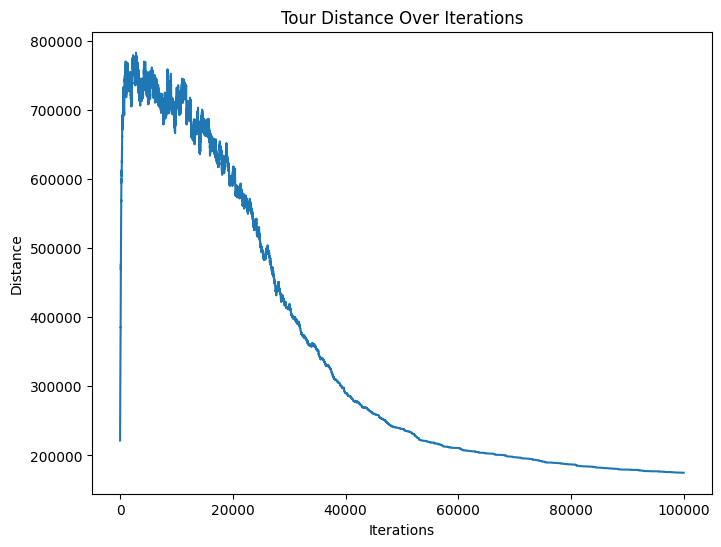

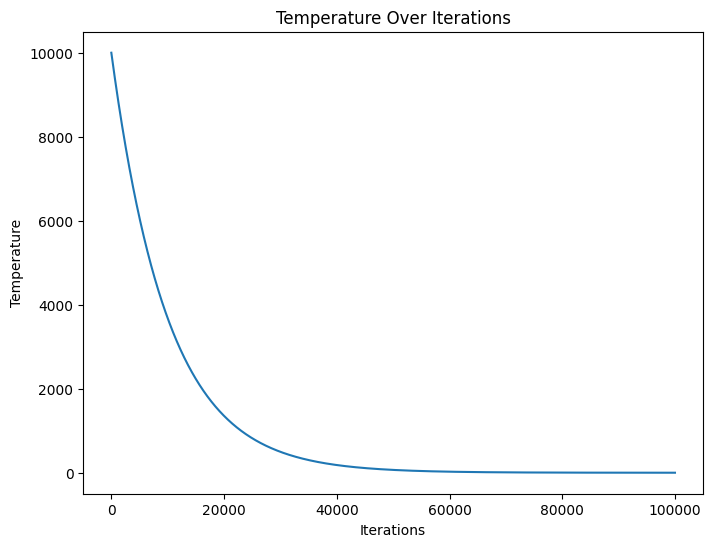

In [11]:
cities = load_graph('TSP-Configurations/pcb442.tsp.txt')

plt.figure(figsize=(8, 6))
plt.scatter([elem[0] for elem in cities], [elem[1] for elem in cities])
plt.title('Map')

distances = calculate_distances(cities)

best_tour, best_distance, cost_over_iterations, temperature_over_interations = perform_annealing(distances, max_iterations=int(1E5), alpha=0.9999)

print("Best tour:", best_tour)
print("Best distance:", best_distance)

plot_tour(best_tour, cities)

plt.figure(figsize=(8, 6))
plt.plot(cost_over_iterations)
plt.title('Tour Distance Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Distance')


plt.plot(temperature_over_interations)
plt.title('Temperature Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Temperature')

plt.show()

In [2]:
cities = load_graph('TSP-Configurations/eil51.tsp.txt')
distances = calculate_distances(cities)

num_runs = 50
run_simulations(num_runs=num_runs, distances=distances, output='fitness_statistics')

(605.3511495807134, 36.12761809410865, (594.9795543517126, 615.7227448097141))

In [13]:
max_iterations_list = range(100, 20000, 1000)

means, stds, conf_intervals = run_vary_maxiter(num_runs, distances, max_iterations_list)


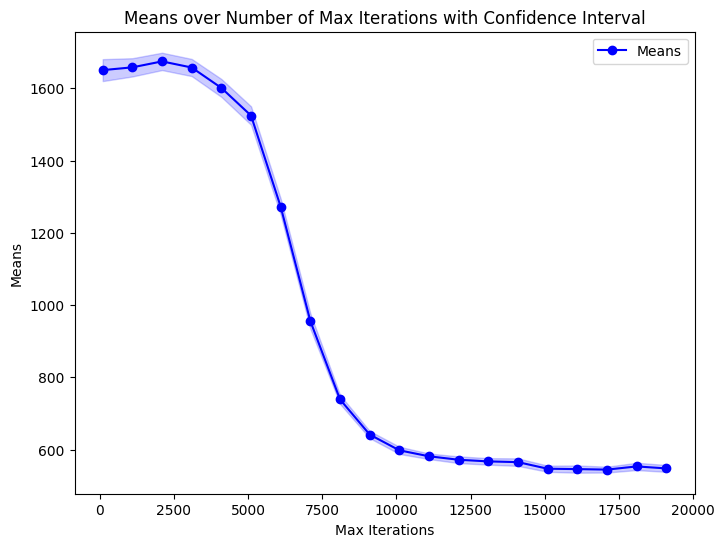

In [14]:
means = np.array(means)
lower_bounds = np.array([interval[0] for interval in conf_intervals])
upper_bounds = np.array([interval[1] for interval in conf_intervals])

plt.figure(figsize=(8, 6))
plt.plot(max_iterations_list, means, marker='o', linestyle='-', color='blue', label='Means')
plt.fill_between(max_iterations_list, lower_bounds, upper_bounds, alpha=0.2, color='blue')


plt.title('Means over Number of Max Iterations with Confidence Interval')
plt.xlabel('Max Iterations')
plt.ylabel('Means')
plt.legend()

plt.show()